C:\Users\Kaviya\AppData\Local\Temp\ipykernel_2656\1596940781.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tweet'].fillna('', inplace=True)   # Replace any missing values with empty strings
C:\Users\Kaviya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - accuracy: 0.7129 - loss: 0.6998 - val_accuracy: 0.8984 - val_loss: 0.2563
Epoch 2/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 216s 354ms/step - accuracy: 0.9213 - loss: 0.2103 - val_accuracy: 0.9313 - val_loss: 0.1803
Epoch 3/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 249s 332ms/step - accuracy: 0.9577 - loss: 0.1221 - val_accuracy: 0.9471 - val_loss: 0.1575
Epoch 4/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 182s 297ms/step - accuracy: 0.9703 - loss: 0.0872 - val_accuracy: 0.9496 - val_loss: 0.1488
Epoch 5/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 204s 341ms/step - accuracy: 0.9753 - loss: 0.0720 - val_accuracy: 0.9518 - val_loss: 0.1529
Epoch 6/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 193s 323ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9527 - val_loss: 0.1550
Epoch 7/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 214s 343ms/step - accuracy: 0.9833 - loss: 0.0511 - val_accuracy: 0.9496 - val_loss: 0.1675
Epoch 8/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 186s 312ms/step - accuracy: 0.9851 -

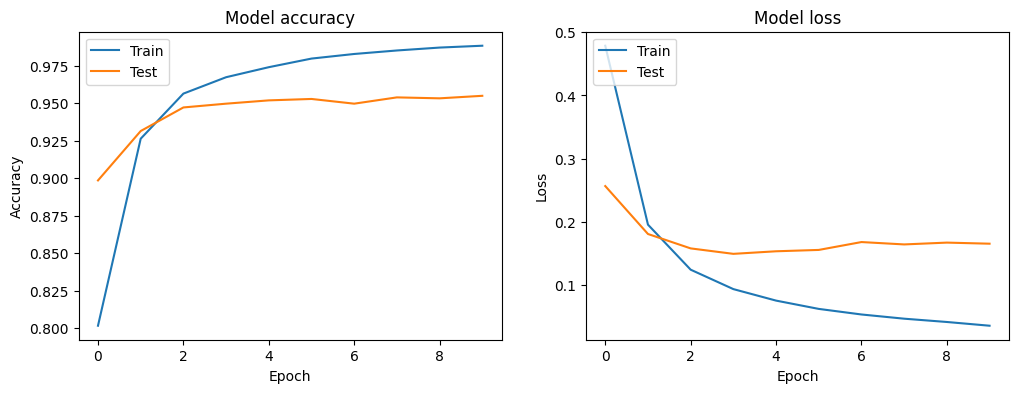

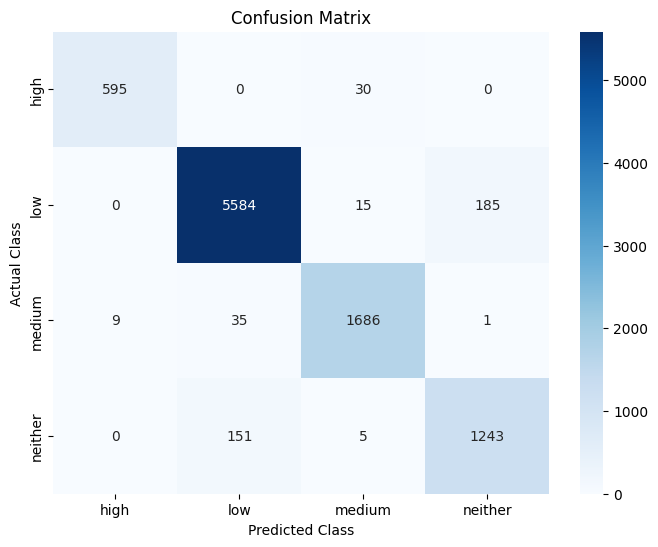

299/299 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step


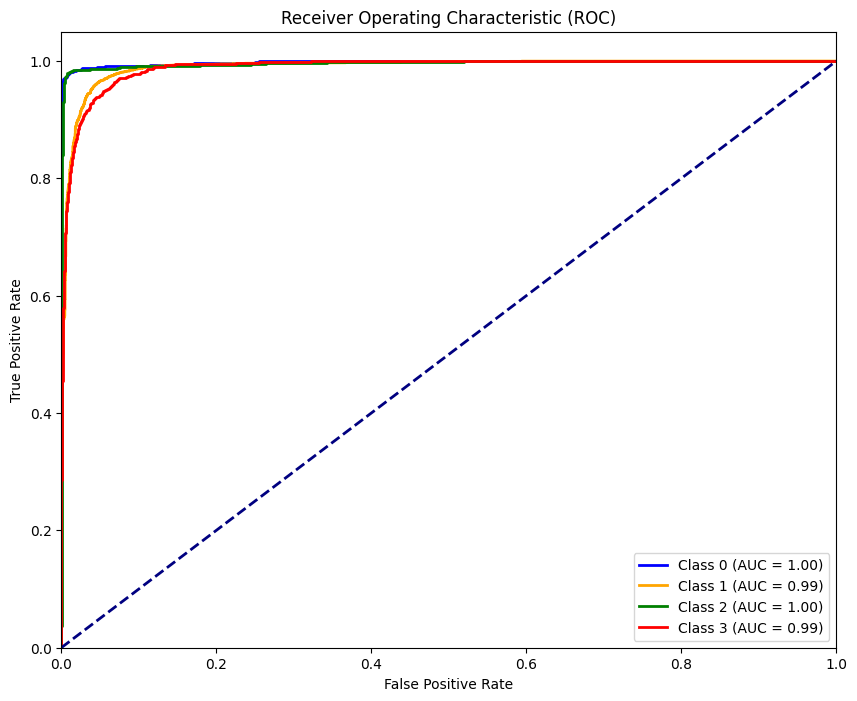

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('classified_tweet (2).csv')

df['Tweet'] = df['Tweet'].astype(str)  # Convert all tweets to strings
df['Tweet'].fillna('', inplace=True)   # Replace any missing values with empty strings

# Split the dataset into features and labels
X = df['Tweet'].values
y = df['Classification'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define the Bi-LSTM model
embedding_dim = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (neither, low, medium, high)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 64

# Removed EarlyStopping callback
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plot accuracy and loss for each epoch
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
y_pred_prob = model.predict(X_test)
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC curve and AUC for each class
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'red']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('bi_lstm_cyberbullying.h5')

# Load and classify a custom input
def classify_text(input_text):
    # Tokenize and pad the input text
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict the class
    prediction = model.predict(input_pad)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Decode the predicted class
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_label


In [10]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('bi_lstm_cyberbullying.h5')

# Create a manual mapping of numerical classes to the class labels
class_labels = {3: 'Neither', 2: 'Low', 1: 'Medium', 0: 'High'}

max_words = 5000
max_len = 100
# Define the function to classify new text
def classify_text(input_text):
    # Tokenize and pad the input text
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict the class
    prediction = model.predict(input_pad)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class index to the corresponding label
    predicted_label = class_labels[predicted_class]

    return predicted_label

# Test with a sample input
sample_text = "yea fuck rt your nigger fuck unfollow fuck dumb nigger"
predicted_classification = classify_text(sample_text)
print(f"Sample tweet classified as: {predicted_classification}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Sample tweet classified as: High
